# Imports/Installs

In [1]:
pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.3 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=34b5049c8d77442d9ebdfd2efeaeafb6942ddf27e8fe3cad85dd57c916ddbaea
  Stored in directory: /root/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty_midi


In [27]:
import os
import numpy as np
import pretty_midi
import seaborn as sns
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [4]:
test_data = pretty_midi.PrettyMIDI('/content/BenWebster_ByeByeBlackbird_FINAL.mid')

In [ ]:
print(test_data.instruments)
print(test_data.get_tempo_changes())
print(test_data.estimate_tempi())

[Instrument(program=0, is_drum=False, name="Melody")]
(array([0.]), array([141.00030315]))
(array([190.64829722, 187.30003016, 172.70850529, 179.40396425,
       158.1311811 , 188.2909767 , 191.83035043, 145.7445933 ,
       166.08624666, 143.2384032 , 164.50035368, 185.24380003,
       132.79916428, 151.36134779, 175.14270558, 191.22543636,
       189.88417579, 162.92111257, 150.95943237, 132.92336271,
       147.66577203, 123.14810404, 157.70130993, 156.78798188,
       194.52975956, 188.52408221, 192.54664442, 159.06027147,
       192.27314066,  98.22952905, 190.38015615, 190.38015615,
       183.85098951, 191.32196611, 190.64829722, 176.94155689,
       159.48193346, 186.0622557 , 182.61084793, 148.95217719,
       163.08468798, 120.32025869, 119.39165691, 184.47739833,
       185.4250562 , 150.67935921,  87.32922002, 184.16366126,
       101.39347642, 189.31509234, 185.4250562 , 169.55360045,
       184.58221503, 188.0004042 ,  91.35677684, 188.0004042 ,
       191.54758164, 119.2

In [ ]:
print(test_data.get_pitch_class_transition_matrix())

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


Text(0, 0.5, 'Proportion')

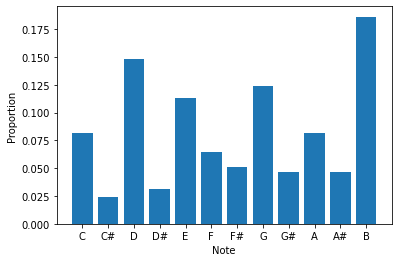

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

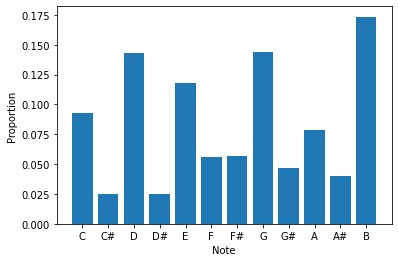

In [ ]:
plt.bar(np.arange(12), test_data.get_pitch_class_histogram(use_duration=True));
plt.xticks(np.arange(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

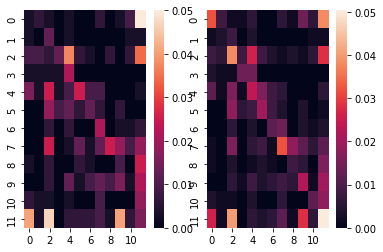

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(test_data.get_pitch_class_transition_matrix(normalize=True), ax=ax1)
sns.heatmap(test_data.get_pitch_class_transition_matrix(time_thresh=0.1, normalize=True), ax=ax2)

In [7]:
transition_matrix = test_data.get_pitch_class_transition_matrix()
print(transition_matrix)

[[ 1.  2.  1.  0.  1.  0.  0.  2.  0.  1.  3. 16.]
 [ 1.  0.  4.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
 [ 3.  3.  2.  4. 12.  2.  1.  0.  2.  0.  2. 11.]
 [ 1.  1.  1.  1.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  1.  8.  1.  3.  8.  3.  3.  0.  0.  0.  1.]
 [ 0.  0.  6.  3.  4.  2.  4.  2.  0.  2.  0.  0.]
 [ 0.  0.  2.  0.  2.  0.  0.  7.  0.  1.  1.  2.]
 [ 0.  0.  8.  0.  1.  4.  1.  4.  8.  6.  3.  6.]
 [ 1.  0.  2.  0.  0.  2.  1.  0.  0.  3.  0.  8.]
 [ 0.  0.  2.  0.  4.  1.  3.  4.  3.  5.  1.  7.]
 [ 2.  1.  1.  0.  1.  0.  0.  3.  0.  0.  0.  6.]
 [13.  1. 15.  0.  2.  2.  2.  3.  1. 13.  2.  5.]]


In [8]:
normalized_transition_matrix = (transition_matrix / transition_matrix.sum(axis=1)[:, None])
normalized_transition_matrix.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print(normalized_transition_matrix)

[[0.03703704 0.07407407 0.03703704 0.         0.03703704 0.
  0.         0.07407407 0.         0.03703704 0.11111111 0.59259259]
 [0.125      0.         0.5        0.         0.125      0.
  0.         0.         0.         0.         0.125      0.125     ]
 [0.07142857 0.07142857 0.04761905 0.0952381  0.28571429 0.04761905
  0.02380952 0.         0.04761905 0.         0.04761905 0.26190476]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.63636364 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.15151515 0.03030303 0.24242424 0.03030303 0.09090909 0.24242424
  0.09090909 0.09090909 0.         0.         0.         0.03030303]
 [0.         0.         0.26086957 0.13043478 0.17391304 0.08695652
  0.17391304 0.08695652 0.         0.08695652 0.         0.        ]
 [0.         0.         0.13333333 0.         0.13333333 0.
  0.         0.46666667 0.         0.06666667 0.06666667 0.13333333]
 [0.         0.         0.19512195 0.         0.02439024 0.09756098
  0.0

## Markov Chain Generation

Here I am assuming that only the previous note matters for the conditional probability of the next note. This is purely to see how interesting the generated MIDI file will be using only the main pitch classes and markov probabilities.

In [9]:
generating_seed = 8
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = D, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=1.000000, pitch=56, velocity=100), Note(start=1.000000, end=2.000000, pitch=59, velocity=100), Note(start=2.000000, end=3.000000, pitch=50, velocity=100), Note(start=3.000000, end=4.000000, pitch=51, velocity=100), Note(start=4.000000, end=5.000000, pitch=52, velocity=100), Note(start=5.000000, end=6.000000, pitch=50, velocity=100), Note(start=6.000000, end=7.000000, pitch=58, velocity=100), Note(start=7.000000, end=8.000000, pitch=48, velocity=100), Note(start=8.000000, end=9.000000, pitch=58, velocity=100), Note(start=9.000000, end=10.000000, pitch=59, velocity=100), Note(start=10.000000, end=11.000000, pitch=54, velocity=100), Note(start=11.000000, end=12.000000, pitch=57, velocity=100), Note(start=12.000000, end=13.000000, pitch=52, velocity=100), Note(start=13.000000, end=14.000000, pitch=53, velocity=100), Note(start=14.000000, end=15.000000, pitch=51, velocity=100), Note(start=15.000000, end=16.000000, pitch=52, velocity=100), Note(start=16.000000, end=

In [10]:
markov_generation.write('markov_file.mid')

In [ ]:
total_velocity = sum(sum(test_data.get_chroma()))
relative_velocities = [sum(semitone)/total_velocity for semitone in test_data.get_chroma()]

In [11]:
note_onsets = test_data.get_onsets()
diffs = np.diff(note_onsets)

In [12]:
df = pd.DataFrame(diffs)
df.head()

,0
0,0.119681
1,0.339095
2,0.093085
3,0.334662
4,0.562942


In [13]:
for i in range(1, 20):
  print(df[0].autocorr(lag=i))

-0.10715865506458105
-0.009365891233449719
-0.029572998655734026
0.006918118671287464
-0.011372083819947925
-0.07414209123533516
0.00015655590516185382
-0.010029621020523101
-0.022774914803371536
-0.01268020981272752
0.04105423018370424
-0.05573869157264071
0.07558720595490699
-0.028875628754764376
-0.020163301584180525
-0.04321019764270097
-0.006882774503549483
0.019852556638214093
0.027637428152013116


In [14]:
instrument = test_data.instruments[0]
notes_array = instrument.notes
print(notes_array)

[Note(start=9.310707, end=9.410441, pitch=59, velocity=97), Note(start=9.430388, end=9.767266, pitch=60, velocity=104), Note(start=9.769483, end=9.858135, pitch=59, velocity=102), Note(start=9.862567, end=10.177283, pitch=60, velocity=108), Note(start=10.197230, end=10.567353, pitch=59, velocity=97), Note(start=10.760172, end=11.021696, pitch=60, velocity=108), Note(start=11.037210, end=11.112565, pitch=59, velocity=98), Note(start=11.125863, end=11.447227, pitch=60, velocity=102), Note(start=11.500419, end=11.784106, pitch=59, velocity=95), Note(start=12.872313, end=13.277897, pitch=59, velocity=105), Note(start=13.293411, end=13.610343, pitch=60, velocity=105), Note(start=13.634722, end=13.991548, pitch=59, velocity=101), Note(start=14.031441, end=14.374969, pitch=61, velocity=111), Note(start=14.423728, end=14.818231, pitch=64, velocity=109), Note(start=14.853691, end=15.179489, pitch=62, velocity=109), Note(start=15.308034, end=15.452094, pitch=59, velocity=101), Note(start=15.7690

### Pitch Differences

In [15]:
pitches = np.array([])
for note in notes_array:
  pitches = np.append(pitches, note.pitch)
pitch_diff = np.diff(pitches)

In [16]:
df['pitch_differences'] = pd.Series(pitch_diff)
df['abs_pitch_differences'] = pd.Series(abs(pitch_diff))

pitch_diff_autocorr = np.array([])

for i in range(1, 15):
  print(df['pitch_differences'].autocorr(lag=i))
  np.append(pitch_diff_autocorr, df['pitch_differences'].autocorr(lag=i))

-0.11743683657315508
-0.08221977930119176
-0.17463369167872905
-0.08201901021648934
-0.06027271152641812
0.024730635033375914
0.12049532250018831
0.04660158582486218
-0.038033149656083176
-0.12926461937586606
0.005062574143961646
-0.08358514200545225
0.08281810434995666
0.0005361159198904945


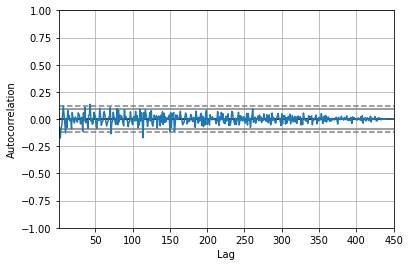

In [17]:
pd.plotting.autocorrelation_plot(df['pitch_differences'])

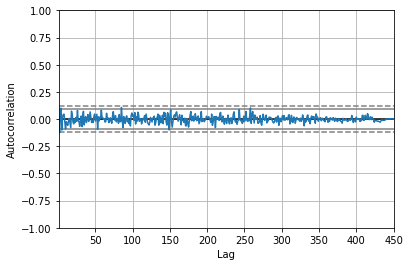

In [18]:
pd.plotting.autocorrelation_plot(df['abs_pitch_differences'])

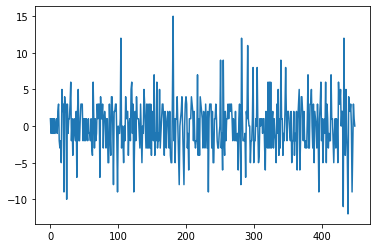

In [36]:
plt.plot(df['pitch_differences'])

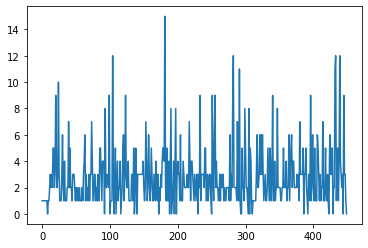

In [37]:
plt.plot(df['abs_pitch_differences'])

In [ ]:
for i in range(1, 15):
  print(df['abs_pitch_differences'].autocorr(lag=i))

0.004316836106453496
-0.12639900243843888
0.07759911796162233
0.1003851307652579
-0.10237315261558735
0.018005640869022548
0.043189593788525237
0.046050536390237956
-0.02539290294636359
-0.09414363547343091
-0.02540372368081871
-0.04747862190373646
-0.05976333050462661
-0.016532632220049442


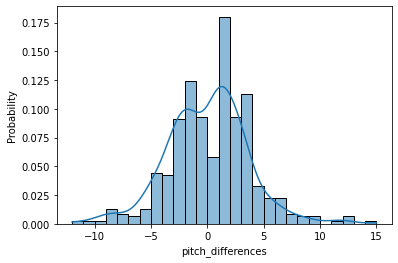

In [19]:
sns.histplot(df['pitch_differences'], stat='probability', kde=True, binwidth=1)

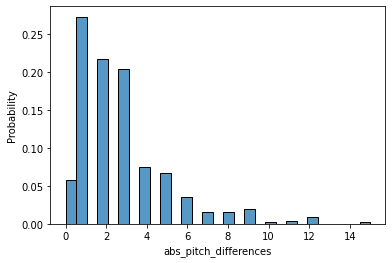

In [20]:
sns.histplot(df['abs_pitch_differences'], stat='probability')

### Note Velocity

In [21]:
velocities = np.array([])
for note in notes_array:
  velocities = np.append(velocities, note.velocity)

df['velocities'] = pd.Series(velocities)

for i in range(1, 15):
  print(df['velocities'].autocorr(lag=i))

velocity_autocorr = [df['velocities'].autocorr(lag=i) for i in range(1, 20)]
print(velocity_autocorr)

0.20053192938119485
0.20384710634049216
0.09642201219541524
0.17664111525334592
0.1441390460992251
0.05854204982299221
0.17299645922945725
0.05962780554886093
0.11538412097348233
0.03217629204087941
0.11414962063032061
0.12712547013594033
0.010838262511584455
0.16573222293226592
[0.20053192938119485, 0.20384710634049216, 0.09642201219541524, 0.17664111525334592, 0.1441390460992251, 0.05854204982299221, 0.17299645922945725, 0.05962780554886093, 0.11538412097348233, 0.03217629204087941, 0.11414962063032061, 0.12712547013594033, 0.010838262511584455, 0.16573222293226592, 0.09872356650791976, 0.15346117010440075, 0.04684346619531862, 0.1056026136640485, 0.10323806314380926]


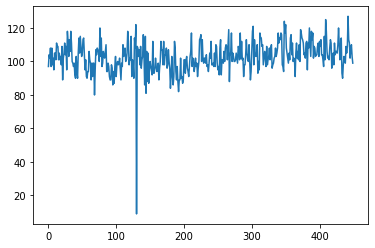

In [25]:
plt.plot(df['velocities'])

In [28]:
adf_velocity = sm.tsa.stattools.adfuller(df['velocities'])
print(adf_velocity)

(-3.5722571734673565, 0.006314105848430447, 13, 436, {'1%': -3.445437655635993, '5%': -2.8681918844944785, '10%': -2.5703132171113543}, 3115.401289002799)


In [30]:
print(df['velocities'].mean())
print(df['velocities'].median())

102.67555555555556
102.0


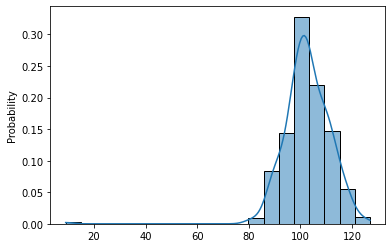

In [31]:
sns.histplot(velocities, stat='probability', kde=True, bins=20)

In [23]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities
0,1.000000,-0.061628,0.248994,-0.178110
pitch_differences,-0.061628,1.000000,0.015578,-0.071242
abs_pitch_differences,0.248994,0.015578,1.000000,-0.045845
velocities,-0.178110,-0.071242,-0.045845,1.000000


In [32]:
# check for cointegration between velocity and pitch differences
import statsmodels.tsa.stattools as ts 
velocity_pitch_diff_coint = ts.coint(df['velocities'], df['pitch_differences'])
print(velocity_pitch_diff_coint)

(-3.5901058964599244, 0.025200676670241073, array([-3.92099806, -3.34977208, -3.05390937]))


In [33]:
import statsmodels.api as sm
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['velocities']
velocity_model = sm.OLS(Y, X)
velocity_reg = velocity_model.fit()
print(velocity_reg.params)
print(velocity_reg.tvalues)
print(velocity_reg.summary())

const                102.675556
pitch_differences     -0.181076
dtype: float64
const                237.219575
pitch_differences     -1.511743
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             velocities   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.285
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.131
Time:                        18:00:18   Log-Likelihood:                -1635.3
No. Observations:                 450   AIC:                             3275.
Df Residuals:                     448   BIC:                             3283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


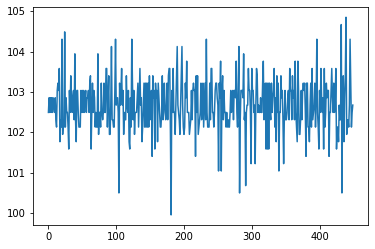

In [34]:
stationary_timeseries = velocity_reg.predict(X)

plt.plot(stationary_timeseries)

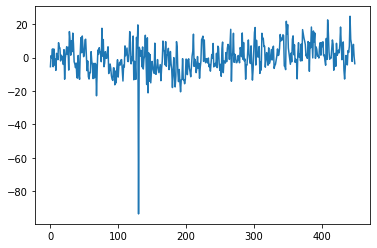

In [35]:
residual = df['velocities'] - stationary_timeseries

plt.plot(residual)

Text(0, 0.5, 'Autocorrelation')

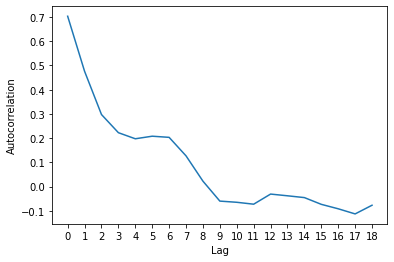

In [ ]:
plt.plot(np.arange(19), velocity_autocorr);
plt.xticks(np.arange(19))
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

### Note Lengths

In [38]:
note_lengths = np.array([])
for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

df['note_lengths'] = pd.Series(note_lengths)

for i in range(1, 15):
  print(df['note_lengths'].autocorr(lag=i))

note_length_autocorr = [df['note_lengths'].autocorr(lag=i) for i in range(1, 20)]
print(note_length_autocorr)

-0.023875934431557083
0.07552683211534453
0.03839679263396763
0.06547358391116773
0.0035883991242379723
0.04294822358566039
0.00838443658781366
0.016853189562664846
-0.037715235261214466
0.0880282448114739
0.07921024809343846
-0.026630123968682803
-0.014708137717257356
-0.05681884198167854
[-0.023875934431557083, 0.07552683211534453, 0.03839679263396763, 0.06547358391116773, 0.0035883991242379723, 0.04294822358566039, 0.00838443658781366, 0.016853189562664846, -0.037715235261214466, 0.0880282448114739, 0.07921024809343846, -0.026630123968682803, -0.014708137717257356, -0.05681884198167854, 0.053887011330169175, -0.019662791270126947, 0.012201656759489697, -0.02744237635647326, -0.02268996790501803]


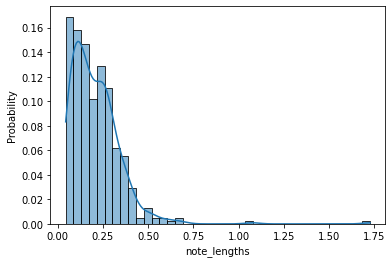

In [40]:
sns.histplot(df['note_lengths'], stat='probability', kde=True)

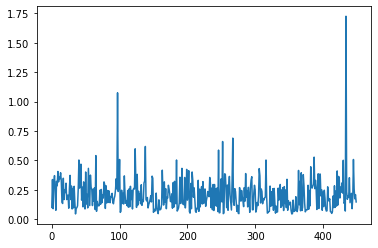

In [41]:
plt.plot(df['note_lengths'])

In [43]:
adf_note_lengths = sm.tsa.stattools.adfuller(df['note_lengths'])
print(adf_note_lengths)

(-21.6625605878343, 0.0, 0, 449, {'1%': -3.4449982835447894, '5%': -2.8679986379826814, '10%': -2.5702102140862397}, -445.0780348207487)


In [44]:
df['note_lengths'].mean()

0.2089189755671288

In [ ]:
pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

df['pitch'] = pd.Series(pitch)

,note_lengths,pitch
pitch,,
49.0,0.246010,1
50.0,0.385637,8
51.0,0.507534,4
52.0,0.503102,15
53.0,0.305850,10
54.0,0.618350,19
55.0,0.363474,34
56.0,0.281471,20
57.0,0.540779,27


In [ ]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.044195,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.385301,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.070434,0.069015,-0.070434
velocities,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000
note_lengths,0.551211,-0.120783,0.069015,0.100938,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,1.000000,0.100938,1.000000


In [45]:
note_length_pitch_differences_coint = ts.coint(df['note_lengths'], df['pitch_differences'])
print(note_length_pitch_differences_coint)

(-21.034689204322735, 0.0, array([-3.92099806, -3.34977208, -3.05390937]))


In [46]:
X = df['pitch_differences']
X = sm.add_constant(X)
Y = df['note_lengths']
note_lengths_model = sm.OLS(Y, X)
note_lengths_reg = note_lengths_model.fit()
print(note_lengths_reg.params)
print(note_lengths_reg.tvalues)
print(note_lengths_reg.summary())

const                0.208919
pitch_differences   -0.004780
dtype: float64
const                31.149601
pitch_differences    -2.575354
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           note_lengths   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.632
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0103
Time:                        18:05:16   Log-Likelihood:                 239.97
No. Observations:                 450   AIC:                            -475.9
Df Residuals:                     448   BIC:                            -467.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


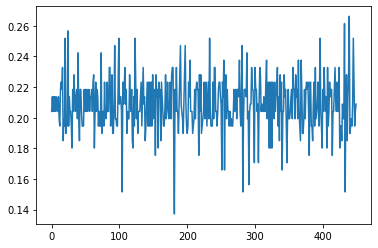

In [47]:
stationary_timeseries = note_lengths_reg.predict(X)

plt.plot(stationary_timeseries)

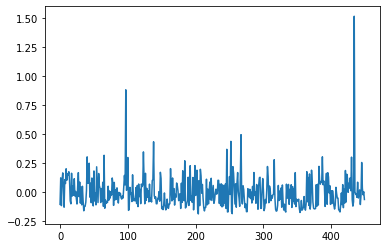

In [48]:
residual = df['note_lengths'] - stationary_timeseries

plt.plot(residual)

### Pitches

In [50]:
# While it's useful to interpret the pitch as separate classes they're technically integers where larger integers
# correspond to higher pitches and we can derive useful insight from viewing them like that as well
pitch = np.array([])
for note in notes_array:
  pitch = np.append(pitch, note.pitch)

df['pitch'] = pd.Series(pitch)

for i in range(1, 15):
  print(df['pitch'].autocorr(lag=i))

pitch_autocorr = [df['pitch'].autocorr(lag=i) for i in range(1, 20)]
print(pitch_autocorr)

0.7030642526961793
0.47587535580180385
0.2974103040805971
0.22248237555374528
0.19739629422145782
0.20798016044104115
0.2032381128109502
0.1268452692789457
0.02245131546681643
-0.059857156117539355
-0.06472616449458478
-0.0726092103538262
-0.03084685157699628
-0.03794778953448314
[0.7030642526961793, 0.47587535580180385, 0.2974103040805971, 0.22248237555374528, 0.19739629422145782, 0.20798016044104115, 0.2032381128109502, 0.1268452692789457, 0.02245131546681643, -0.059857156117539355, -0.06472616449458478, -0.0726092103538262, -0.03084685157699628, -0.03794778953448314, -0.04538447936529851, -0.07323092778243448, -0.09158143237729469, -0.11273800607693207, -0.07692298311693586]


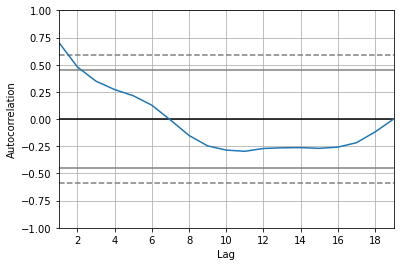

In [51]:
pd.plotting.autocorrelation_plot(pitch_autocorr)

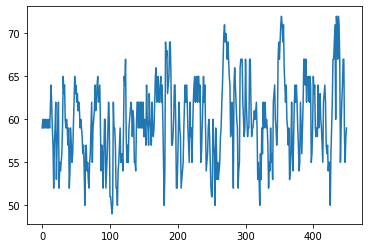

In [52]:
df['pitch'].plot.line()

In [53]:
adf = sm.tsa.stattools.adfuller(df['pitch'])
print(adf)

(-6.010344717258276, 1.5789581051357013e-07, 8, 441, {'1%': -3.4452655826028318, '5%': -2.868116205869215, '10%': -2.570272878944473}, 2276.2320199460414)


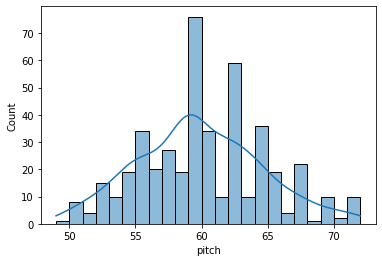

In [54]:
sns.histplot(df['pitch'], kde=True, binwidth=1)

In [55]:
df.corr()

,0,pitch_differences,abs_pitch_differences,velocities,note_lengths,pitch
0,1.000000,-0.061628,0.248994,-0.178110,0.551211,-0.044195
pitch_differences,-0.061628,1.000000,0.015578,-0.071242,-0.120783,-0.385301
abs_pitch_differences,0.248994,0.015578,1.000000,-0.045845,0.069015,-0.070434
velocities,-0.178110,-0.071242,-0.045845,1.000000,-0.158113,0.237051
note_lengths,0.551211,-0.120783,0.069015,-0.158113,1.000000,0.100938
pitch,-0.044195,-0.385301,-0.070434,0.237051,0.100938,1.000000


# A Slightly Less Boring Model

This model will use the simple linear regressions between note lengths and pitch difference, and velocity and pitch difference to create a MIDI file that sounds less robotic if still somewhat boring.

In [56]:
generating_seed = 0
# categories correspond to the pitch classes in pretty_midi (0 = C, 1 = C#, ..., 11 = B)
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)
generated_note_lengths = note_lengths_reg.predict(note_diffs)

# add to MIDI file
markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
markov_generation.instruments.append(inst)
velocity = 100
for pitch, start, end in zip(notes, [x for x in range(len(notes))], [x+1.0 for x in range(len(notes))]):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

ValueError: ignored

In [57]:
generating_seed = 0

categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
notes = np.array([])
notes = np.append(notes, generating_seed)
for note in range(100):
  probs = normalized_transition_matrix[generating_seed]
  next_generating_seed = np.random.choice(categories, p=probs)
  notes = np.append(notes, next_generating_seed)
  generating_seed = next_generating_seed

note_diffs = np.diff(notes)

X = note_diffs
X = sm.add_constant(X)
generated_note_lengths = note_lengths_reg.predict(X)
generated_velocities = velocity_reg.predict(X)

In [58]:
cumulative_note_lengths = np.cumsum(generated_note_lengths)
note_starts = cumulative_note_lengths - generated_note_lengths
note_ends = cumulative_note_lengths

[ 0.165899    0.37481798  0.58373695  0.78309594  1.03503488  1.24873386
  1.45287283  1.61877184  1.83725081  2.05094978  2.28854874  2.48790772
  2.71116669  2.90574567  3.10510465  3.29012364  3.50860261  3.70796159
  3.95990054  4.17359951  4.38729849  4.5436375   4.80513644  4.96147545
  5.17995442  5.39843339  5.60735236  5.80193135  6.00607032  6.23888929
  6.44302826  6.66150723  6.86086621  7.09368518  7.29304416  7.48762314
  7.69176212  7.8863411   8.11916007  8.34719903  8.53699802  8.731577
  8.93093598  9.19243492  9.34877393  9.55769291  9.81919185  9.97553086
 10.21790981 10.42204879 10.63574777 10.83032675 11.06314571 11.26250469
 11.45708368 11.67556265 11.89404162 12.09818059 12.29753958 12.52557854
 12.69147754 12.94341649 13.14277547 13.34213445 13.54627343 13.75041241
 13.9449914  14.19693034 14.39628933 14.59086831 14.82368727 15.02782625
 15.23196523 15.46000419 15.6211232  15.86828215 16.07242113 16.27656011
 16.49503908 16.66093808 16.87941705 17.08833602 17.2

In [59]:
better_markov_generation = pretty_midi.PrettyMIDI(initial_tempo=200)
inst = pretty_midi.Instrument(program=66, is_drum=False, name='Tenor Sax')
better_markov_generation.instruments.append(inst)

for pitch, velocity, start, end in zip(notes, generated_velocities, note_starts, note_ends):
    inst.notes.append(pretty_midi.Note(int(velocity), int(pitch)+48, start, end))
print(inst.notes)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

In [60]:
better_markov_generation.write('better_test_file.mid')

In [63]:
generated_file = pd.DataFrame()

instrument = better_markov_generation.instruments[0]
notes_array = instrument.notes
print(notes_array)

pitch = np.array([])
note_lengths = np.array([])

for note in notes_array:
  pitch = np.append(pitch, note.pitch)

for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

generated_file['pitch'] = pd.Series(pitch)

note_lengths = np.array([])
for note in notes_array:
  note_lengths = np.append(note_lengths, note.end - note.start)

df['note_lengths'] = pd.Series(note_lengths)

[Note(start=0.000000, end=0.165899, pitch=48, velocity=101), Note(start=0.165899, end=0.374818, pitch=57, velocity=102), Note(start=0.374818, end=0.583737, pitch=57, velocity=102), Note(start=0.583737, end=0.783096, pitch=57, velocity=102), Note(start=0.783096, end=1.035035, pitch=59, velocity=104), Note(start=1.035035, end=1.248734, pitch=50, velocity=102), Note(start=1.248734, end=1.452873, pitch=49, velocity=102), Note(start=1.452873, end=1.618772, pitch=50, velocity=101), Note(start=1.618772, end=1.837251, pitch=59, velocity=103), Note(start=1.837251, end=2.050950, pitch=57, velocity=102), Note(start=2.050950, end=2.288549, pitch=56, velocity=103), Note(start=2.288549, end=2.487908, pitch=50, velocity=102), Note(start=2.487908, end=2.711167, pitch=52, velocity=103), Note(start=2.711167, end=2.905746, pitch=49, velocity=102), Note(start=2.905746, end=3.105105, pitch=52, velocity=102), Note(start=3.105105, end=3.290124, pitch=54, velocity=101), Note(start=3.290124, end=3.508603, pitc

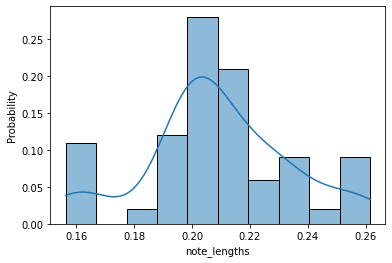

In [64]:
sns.histplot(df['note_lengths'], stat='probability', kde=True)

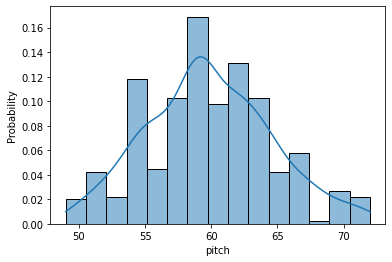

In [65]:
sns.histplot(df['pitch'], stat='probability', kde=True)

# The Glorious LSTM Model

In [66]:
pitchnames = sorted(set(item for item in df['pitch']))
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
print(note_to_int)

sequence_length = 10
pitch_inputs = []
pitch_outputs = []

for i in range(0, len(df['pitch']) - sequence_length, 1):
    sequence_in = df['pitch'][i:i + sequence_length]
    sequence_out = df['pitch'][i + sequence_length]
    pitch_inputs.append([note_to_int[char] for char in sequence_in])
    pitch_outputs.append(note_to_int[sequence_out])

{49.0: 0, 50.0: 1, 51.0: 2, 52.0: 3, 53.0: 4, 54.0: 5, 55.0: 6, 56.0: 7, 57.0: 8, 58.0: 9, 59.0: 10, 60.0: 11, 61.0: 12, 62.0: 13, 63.0: 14, 64.0: 15, 65.0: 16, 66.0: 17, 67.0: 18, 68.0: 19, 69.0: 20, 70.0: 21, 71.0: 22, 72.0: 23}


In [67]:
import tensorflow as tf
pitch_inputs = np.reshape(pitch_inputs, (len(pitch_inputs), sequence_length, 1))
pitch_outputs = tf.keras.utils.to_categorical(pitch_outputs, num_classes=24)
pitch_outputs = np.asarray(pitch_outputs)
#pitch_outputs = np.reshape(pitch_outputs, (len(pitch_outputs), 24, 1))

In [68]:
pitch_inputs = np.asarray(pitch_inputs)

In [69]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24)


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(LSTM(256, input_shape = (pitch_inputs.shape[1], pitch_inputs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(24))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [80]:
print(pitch_inputs.shape)
print(pitch_outputs.shape)

(440, 10, 1)
(440, 24)


In [81]:
model.fit(pitch_inputs, pitch_outputs, epochs=200, batch_size=64)

Epoch 1/200
7/7 [==============================] - 3s 53ms/step - loss: 3.0576
Epoch 2/200
7/7 [==============================] - 0s 54ms/step - loss: 2.7829
Epoch 3/200
7/7 [==============================] - 0s 57ms/step - loss: 2.7633
Epoch 4/200
7/7 [==============================] - 1s 78ms/step - loss: 2.7229
Epoch 5/200
7/7 [==============================] - 1s 79ms/step - loss: 2.7082
Epoch 6/200
7/7 [==============================] - 1s 84ms/step - loss: 2.6701
Epoch 7/200
7/7 [==============================] - 1s 78ms/step - loss: 2.6504
Epoch 8/200
7/7 [==============================] - 1s 78ms/step - loss: 2.6281
Epoch 9/200
7/7 [==============================] - 1s 77ms/step - loss: 2.6199
Epoch 10/200
7/7 [==============================] - 1s 79ms/step - loss: 2.5945
Epoch 11/200
7/7 [==============================] - 1s 82ms/step - loss: 2.5725
Epoch 12/200
7/7 [==============================] - 1s 74ms/step - loss: 2.5181
Epoch 13/200
7/7 [==============================]

In [82]:
model.save('benWebsterBot.h5')